David Danilo Guio Solano 
Predicción conjunto de datos del titanic

Regresión Logística

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [203]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [205]:
# lectura de datos en Python y lo cargamos en la variable Datos
datos = pd.read_csv('./Titanic-Dataset.csv')

In [207]:
# Realizamos lectura de los Datos para el análisis exploratorio
datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [209]:
# Descripción de los datos
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos (Edad)')

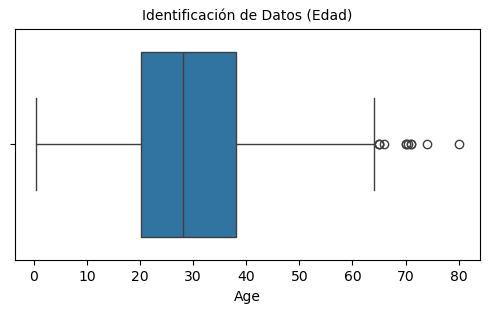

In [211]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['Age']) #indicamos que columna graficar
plt.title('Identificación de Datos (Edad)', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [213]:
#Revisión de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Edad: ",datos['Age'].isin([0]).sum()) 
print("Cantidad de Registros con cero en Numero hermanos/conyugue abordo: ",datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Numero padres/hijos abordo: ",datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa del pasajero: ",datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Numero hermanos/conyugue abordo:  608
Cantidad de Registros con cero en Numero padres/hijos abordo:  678
Cantidad de Registros con cero en Tarifa del pasajero:  15


In [215]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

datos['Age']=datos['Age'].replace('NaN',datos['Age'].mean()) #los campos vacios de edad los promediamos con la edad del barco
datos['Age']=datos['Age'].replace(0,datos['Age'].mean()) #Los campos con edad 0 tambien los promediamos

In [217]:
#Revisión nuevamente de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Edad: ",datos['Age'].isin([0]).sum()) 

#para contar cuantos datos estan en Vacios
print("Cantidad de Registros vacios en Edad: ",datos['Age'].isin(['NaN']).sum()) 

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros vacios en Edad:  0


In [219]:
#Conteo de Datos Atípicos

#Presion arterial en reposo
nivel_minimo=0
nivel_maximo=80
Total_Atipicos=((datos['Age']<nivel_minimo)|(datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [221]:
# Filtra Datos Atípicos

datos=datos[(datos['Age']<nivel_maximo)&(datos['Age']>nivel_minimo)]

In [223]:
# Validar si se removieron los datos atípicos

#Presion arterial en reposo
Total_Atipicos=((datos['Age']<nivel_minimo)|(datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [225]:
#Revisión del tipo de datos y datos faltantes

datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          713 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        184 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.4+ KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Característica de interes:AgeicTomamos la edad para sabe que tipo de población fue la que se encontraba en el titanices)

In [282]:
# Total de personas 

datos['Survived'].value_counts()

Survived
0    424
1    289
Name: count, dtype: int64

In [284]:
datos[['Survived']].head(100)

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
120,0
122,0
123,1
124,0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [286]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [288]:
print (X_train)

     PassengerId  Pclass                                               Name  \
649          650       3                    Stanley, Miss. Amy Zillah Elsie   
548          549       3                          Goldsmith, Mr. Frank John   
141          142       3                           Nysten, Miss. Anna Sofia   
221          222       2                               Bracken, Mr. James H   
788          789       3                         Dean, Master. Bertram Vere   
..           ...     ...                                                ...   
610          611       3  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
83            84       1                            Carrau, Mr. Francisco M   
244          245       3                               Attalah, Mr. Sleiman   
808          809       2                                  Meyer, Mr. August   
191          192       2                              Carbines, Mr. William   

        Sex   Age  SibSp  Parch     Ticket    Fare 

In [290]:
print (Y_train)

649    1
548    0
141    1
221    0
788    1
      ..
610    0
83     0
244    0
808    0
191    0
Name: Survived, Length: 534, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [ ]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [153]:
print (Y_test)

544    0
294    0
372    0
886    0
360    0
      ..
708    1
333    0
798    0
860    0
624    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
print (Prediccion)

In [ ]:
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [ ]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

In [ ]:
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [ ]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos
Del desempeño del modelo se puede describir:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "diabético" es 0,70, lo que significa que el 70% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 0,57, lo que indica que el modelo identificó correctamente al 57% de todos los diabéticos.

F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "diabética" es 0,61, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 109

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 31

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,69 lo que significa que el 69 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.